<a href="https://colab.research.google.com/github/ramonferrari/mpgc_ti/blob/main/BDADS_2S2023_Tarefa_Aulas_5_e_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa Aulas 5 e 6
# Exploração de Cluster Analysis e SNA em R
#### Grupo:
1.   Antonio Angelo dos Santos
2. Gabriel Menegon Cardozo
3. Gustavo Salomão
4. Lucas Felipe Ballesteros Martins
5. Ramon Moreno Ferrari
6. Valter Bellei



### Preparação: instala e carrega pacotes necessários

In [1]:
install.packages("network")
install.packages("sna")
install.packages("rgl")
install.packages("ergm")
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘rbibutils’, ‘robustbase’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘Rdpack’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
suppressWarnings(suppressMessages(library(network)))
suppressWarnings(suppressMessages(library(sna)))
suppressWarnings(suppressMessages(library(rgl)))
suppressWarnings(suppressMessages(library(ergm)))
suppressWarnings(suppressMessages(library(igraph)))

## Rede One Mode



In [3]:
# Endereço do arquivo na nuvem, para funcionar para todos os colegas, em qualquer computador
url_dataset <- c("https://raw.githubusercontent.com/ramonferrari/mpgc_ti/main/Rede%20One%20Mode_Tarefa%20Aulas%205%20e%206.csv")


In [4]:
# Leitura dos dados
rede <- read.table(url_dataset,header=TRUE,sep = ",")

In [5]:
# Dataset lido corretamente?
head(rede)
names(rede)

,Label,A,B,C,D,E,F,G,H,I,⋯,N,O,P,Q,R,S,T,U,V,W
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,A,0,1,1,1,1,0,0,0,0,⋯,1,1,1,0,0,1,0,1,1,1
2,B,1,0,1,1,0,0,0,0,0,⋯,0,1,1,1,0,0,0,0,1,1
3,C,1,1,0,1,0,0,0,0,0,⋯,1,0,1,1,0,0,0,0,0,1
4,D,1,1,1,0,1,0,0,0,0,⋯,1,1,0,0,0,1,0,0,0,0
5,E,1,0,0,1,0,1,1,1,1,⋯,0,0,1,1,0,0,0,0,0,0
6,F,0,0,0,0,1,0,1,0,0,⋯,0,0,0,1,0,0,0,0,0,0


[1] "Label" "A"     "B"     "C"     "D"     "E"     "F"     "G"     "H"    
[10] "I"     "J"     "K"     "L"     "M"     "N"     "O"     "P"     "Q"    
[19] "R"     "S"     "T"     "U"     "V"     "W"

In [9]:
# Adaptando o data.frame rede para que possa servir para a montagem da rede
grede <- rede[,2:24]
rownames(grede) <- rede[,1]

head(grede)
names(grede)

,A,B,C,D,E,F,G,H,I,J,⋯,N,O,P,Q,R,S,T,U,V,W
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,0,1,1,1,1,0,0,0,0,1,⋯,1,1,1,0,0,1,0,1,1,1
B,1,0,1,1,0,0,0,0,0,1,⋯,0,1,1,1,0,0,0,0,1,1
C,1,1,0,1,0,0,0,0,0,0,⋯,1,0,1,1,0,0,0,0,0,1
D,1,1,1,0,1,0,0,0,0,1,⋯,1,1,0,0,0,1,0,0,0,0
E,1,0,0,1,0,1,1,1,1,1,⋯,0,0,1,1,0,0,0,0,0,0
F,0,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W"

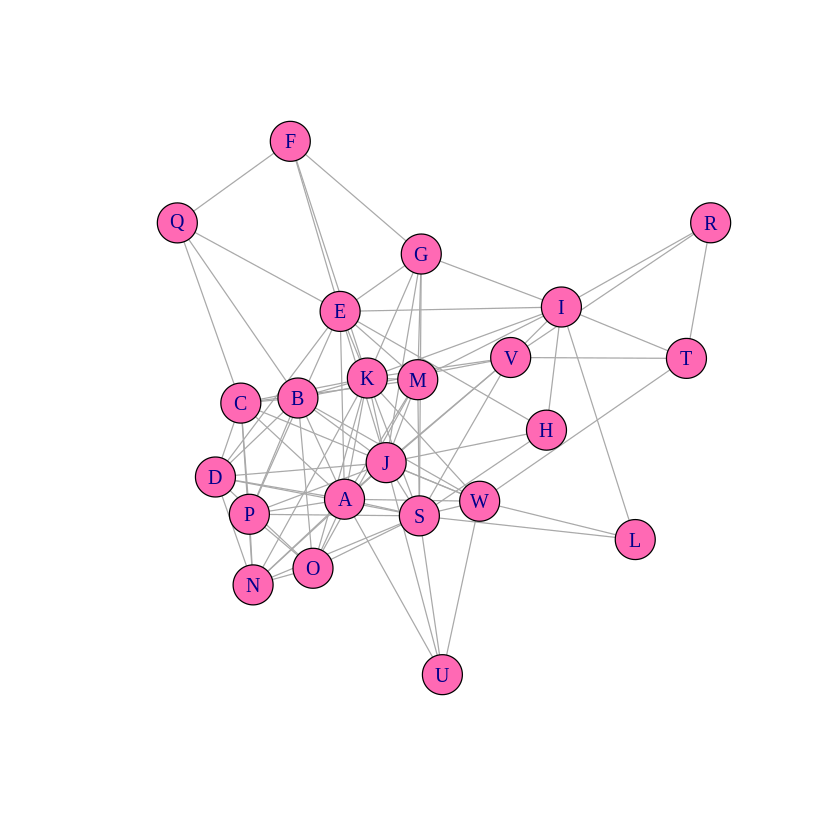

In [10]:
# Para funcionar corretamente com o igraph, fizemos a leitura diretamente da tabela fornecida:
g <- graph_from_literal(A-B,A-C,A-D,A-E,A-J,A-K,A-M,A-N,A-O,A-P,A-S,A-U,A-V,A-W,
                                        B-C,B-D,B-J,B-K,B-O,B-P,B-Q,B-V,B-W,
                                        C-D,C-K,C-M,C-N,C-P,C-Q,C-W,
                                        D-E,D-J,D-N,D-O,D-S,
                                        E-F,E-G,E-H,E-I,E-J,E-K,E-M,E-P,E-Q,
                                        F-G,F-K,F-Q,
                                        G-I,G-J,G-K,G-M,G-S,
                                        H-I,H-J,H-S,
                                        I-K,I-L,I-M,I-R,I-T,I-V,
                                        J-K,J-M,J-N,J-P,J-S,J-U,J-V,J-W,
                                        K-M,K-N,K-O,K-S,K-V,K-W,
                                        L-S,L-W,
                                        M-O,M-S,
                                        N-O,N-P,N-S,
                                        O-P,O-S,
                                        P-S,
                                        R-T,R-V,
                                        S-U,S-V,S-W,
                                        T-V,T-W,
                                        U-W)
set.seed(004)
plot(g,vertex.color = "hotpink")

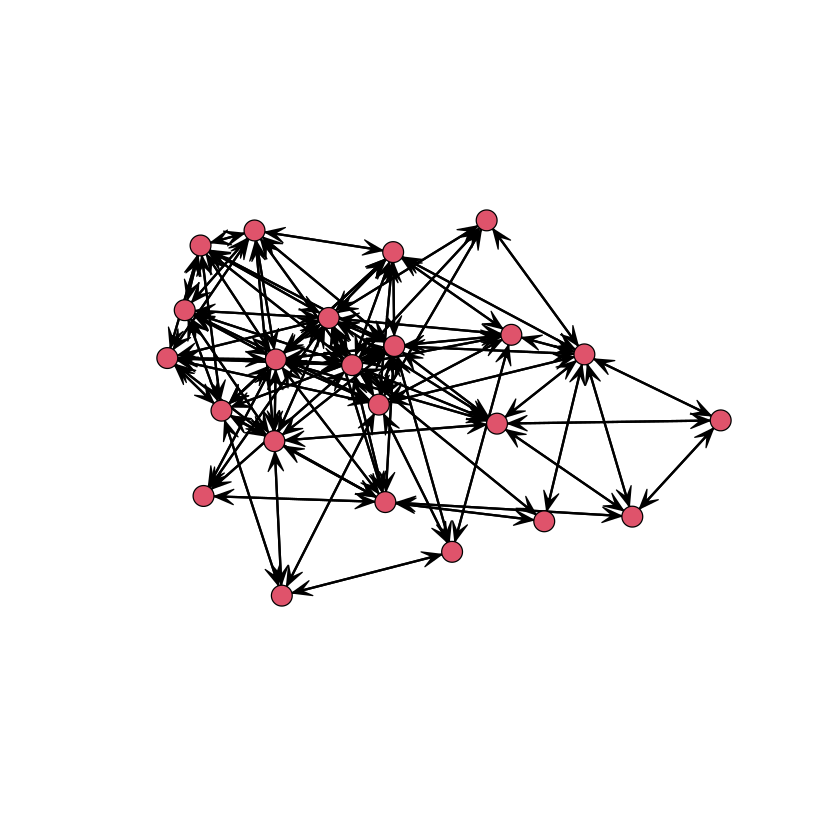

In [11]:
gplot(grede)

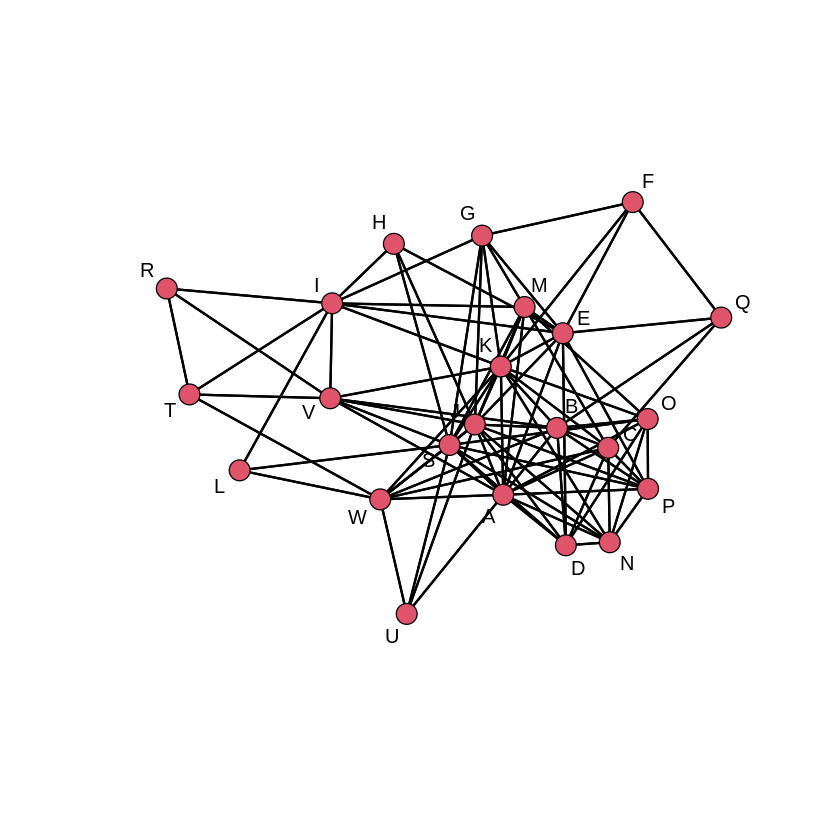

In [12]:
gplot(grede,gmode="graph",displaylabels = TRUE)

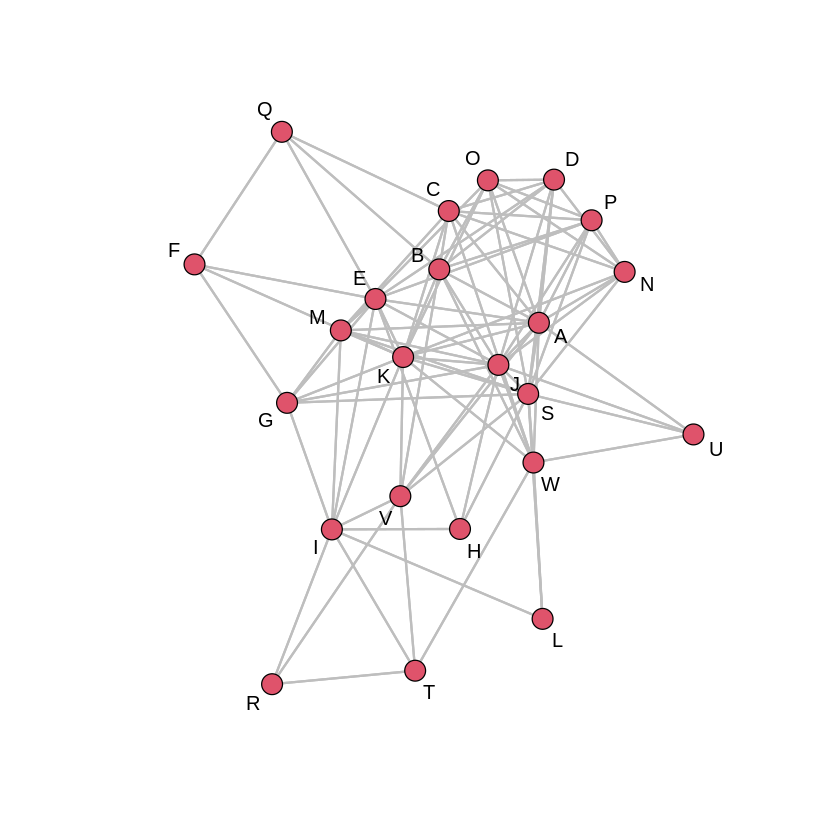

In [13]:
gplot(grede,gmode="graph",displaylabels = TRUE,edge.col="gray",usearrows=FALSE)

In [14]:
# Explorando a rede
print("|-------------------------------------")
print("Degree")
degree(g)
print("|-------------------------------------")
print("Closeness")
closeness(g)
print("|-------------------------------------")
print("Betweenness")
betweenness(g)

[1] "|-------------------------------------"
[1] "Degree"


A  B  C  D  E  J  K  M  N  O  P  S  U  V  W  Q  F  G  H  I  L  R  T 
14 10  9  8 11 14 14  9  8  8  8 14  4  8  9  4  4  7  4  9  3  3  4

[1] "|-------------------------------------"
[1] "Closeness"


A          B          C          D          E          J          K 
0.03333333 0.02941176 0.02702703 0.02631579 0.03030303 0.03333333 0.03333333 
         M          N          O          P          S          U          V 
0.02857143 0.02631579 0.02631579 0.02631579 0.03225806 0.02272727 0.02777778 
         W          Q          F          G          H          I          L 
0.02857143 0.02222222 0.02272727 0.02702703 0.02439024 0.02777778 0.02325581 
         R          T 
0.02040816 0.02173913

[1] "|-------------------------------------"
[1] "Betweenness"


A          B          C          D          E          J          K 
12.9431040 10.3765735  6.7169048  1.9123395 18.5135137 17.3055203 21.6396775 
         M          N          O          P          S          U          V 
 4.4891887  1.0376708  1.3828571  1.9123395 23.8868040  0.0000000 15.3562281 
         W          Q          F          G          H          I          L 
14.7284227  1.3768116  0.8300000  3.1769298  0.6035965 20.2369565  0.6052632 
         R          T 
 0.0000000  1.9692982

In [15]:
# Estrutura de componentes
# matriz adjacência:
get.adjacency(g)
# vertices e arestas:
V(g)
vcount(g)
E(g)
ecount(g)
g
clique_num(g)
clique_size_counts(g)

  [[ suppressing 23 column names ‘A’, ‘B’, ‘C’ ... ]]



23 x 23 sparse Matrix of class "dgCMatrix"
                                               
A . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . .
B 1 . 1 1 . 1 1 . . 1 1 . . 1 1 1 . . . . . . .
C 1 1 . 1 . . 1 1 1 . 1 . . . 1 1 . . . . . . .
D 1 1 1 . 1 1 . . 1 1 . 1 . . . . . . . . . . .
E 1 . . 1 . 1 1 1 . . 1 . . . . 1 1 1 1 1 . . .
J 1 1 . 1 1 . 1 1 1 . 1 1 1 1 1 . . 1 1 . . . .
K 1 1 1 . 1 1 . 1 1 1 . 1 . 1 1 . 1 1 . 1 . . .
M 1 . 1 . 1 1 1 . . 1 . 1 . . . . . 1 . 1 . . .
N 1 . 1 1 . 1 1 . . 1 1 1 . . . . . . . . . . .
O 1 1 . 1 . . 1 1 1 . 1 1 . . . . . . . . . . .
P 1 1 1 . 1 1 . . 1 1 . 1 . . . . . . . . . . .
S 1 . . 1 . 1 1 1 1 1 1 . 1 1 1 . . 1 1 . 1 . .
U 1 . . . . 1 . . . . . 1 . . 1 . . . . . . . .
V 1 1 . . . 1 1 . . . . 1 . . . . . . . 1 . 1 1
W 1 1 1 . . 1 1 . . . . 1 1 . . . . . . . 1 . 1
Q . 1 1 . 1 . . . . . . . . . . . 1 . . . . . .
F . . . . 1 . 1 . . . . . . . . 1 . 1 . . . . .
G . . . . 1 1 1 1 . . . 1 . . . . 1 . . 1 . . .
H . . . . 1 1 . . . . . 1 . . . . . . . 1 . .

+ 23/23 vertices, named, from 06eea27:
 [1] A B C D E J K M N O P S U V W Q F G H I L R T

[1] 23

+ 93/93 edges from 06eea27 (vertex names):
 [1] A--B A--C A--D A--E A--J A--K A--M A--N A--O A--P A--S A--U A--V A--W B--C
[16] B--D B--J B--K B--O B--P B--V B--W B--Q C--D C--K C--M C--N C--P C--W C--Q
[31] D--E D--J D--N D--O D--S E--J E--K E--M E--P E--Q E--F E--G E--H E--I J--K
[46] J--M J--N J--P J--S J--U J--V J--W J--G J--H K--M K--N K--O K--S K--V K--W
[61] K--F K--G K--I M--O M--S M--G M--I N--O N--P N--S O--P O--S P--S S--U S--V
[76] S--W S--G S--H S--L U--W V--I V--R V--T W--L W--T Q--F F--G G--I H--I I--L
[91] I--R I--T R--T

[1] 93

IGRAPH 06eea27 UN-- 23 93 -- 
+ attr: name (v/c)
+ edges from 06eea27 (vertex names):
 [1] A--B A--C A--D A--E A--J A--K A--M A--N A--O A--P A--S A--U A--V A--W B--C
[16] B--D B--J B--K B--O B--P B--V B--W B--Q C--D C--K C--M C--N C--P C--W C--Q
[31] D--E D--J D--N D--O D--S E--J E--K E--M E--P E--Q E--F E--G E--H E--I J--K
[46] J--M J--N J--P J--S J--U J--V J--W J--G J--H K--M K--N K--O K--S K--V K--W
[61] K--F K--G K--I M--O M--S M--G M--I N--O N--P N--S O--P O--S P--S S--U S--V
[76] S--W S--G S--H S--L U--W V--I V--R V--T W--L W--T Q--F F--G G--I H--I I--L
[91] I--R I--T R--T

[1] 5

[1]  23  93 133  83  18

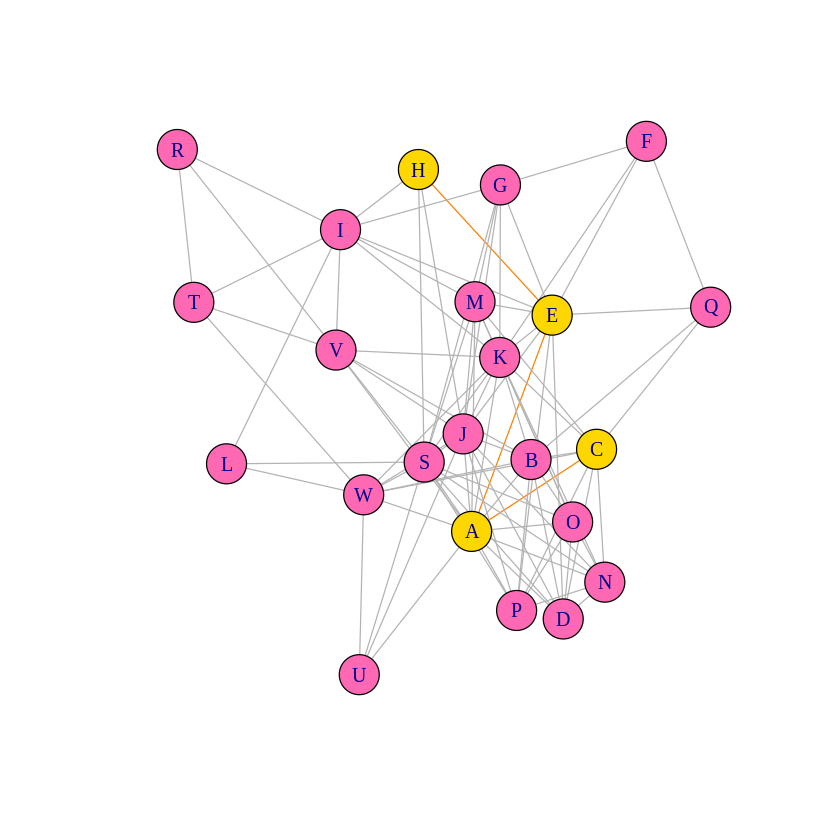

In [16]:
# Gráfico diâmetro
diam <- get_diameter(g, directed=F)
vcol <- rep("hotpink", vcount(g))
vcol[diam] <- "gold"
ecol <- rep("gray70", ecount(g))
ecol[E(g, path=diam)] <- "darkorange1"
# E(net, path=diam) finds edges along a path, here 'diam'

set.seed(0013)
plot(g, vertex.color=vcol, edge.color=ecol, edge.arrow.mode=0)

In [17]:
mean_distance(g, directed=F)
mean_distance(g, directed=T)

edge_density(g, loops=F)
edge_density(g, loops=T)

[1] 1.715415

[1] 1.715415

[1] 0.3675889

[1] 0.3369565

In [25]:
# Comando ?til para explorar redes
# Gera redes aleat?rias
grede2 <- rgraph(10)
grede2

0,0,0,1,1,1,0,0,1,1
1,0,0,0,1,0,0,0,1,1
1,1,0,1,1,1,1,0,0,1
0,1,0,0,1,0,1,0,1,0
0,1,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,1,1
1,0,1,1,1,1,0,0,0,0
1,1,0,0,1,1,0,0,0,0
1,0,1,0,1,0,1,0,0,0
1,1,1,1,0,0,1,1,0,0


## Rede One Mode - Alteração 1


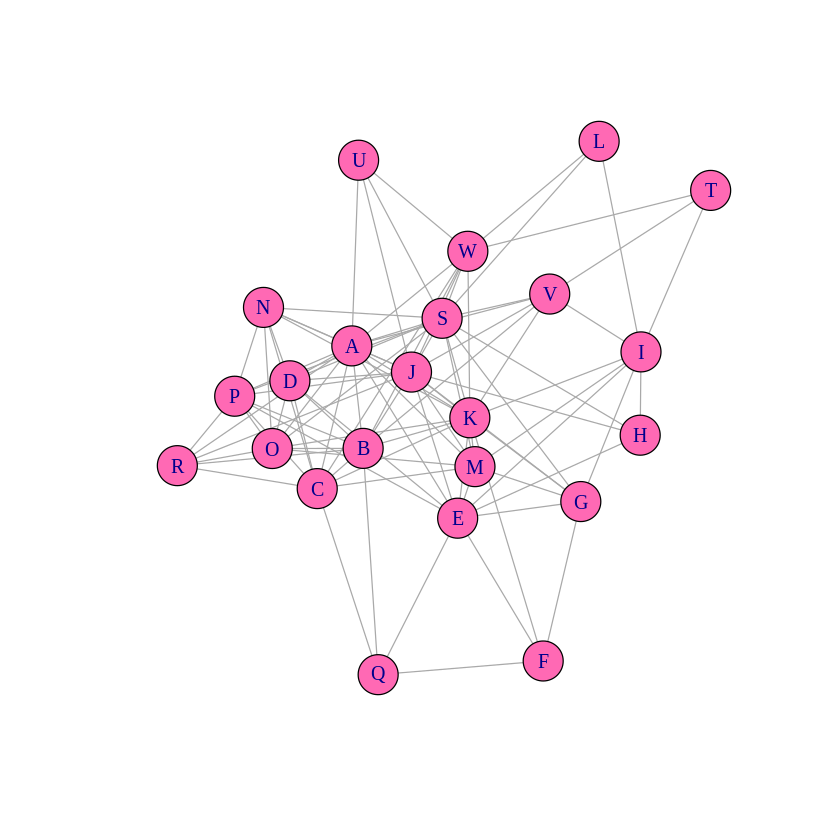

In [26]:
g1 <- graph_from_literal(A-B,A-C,A-D,A-E,A-J,A-K,A-M,A-N,A-O,A-P,A-R,A-S,A-U,A-V,A-W,
                         B-C,B-D,B-J,B-K,B-O,B-P,B-Q,B-R,B-V,B-W,
                         C-D,C-K,C-M,C-N,C-P,C-Q,C-R,C-W,
                         D-E,D-J,D-N,D-O,D-S,
                         E-F,E-G,E-H,E-I,E-J,E-K,E-M,E-P,E-Q,
                         F-G,F-K,F-Q,
                         G-I,G-J,G-K,G-M,G-S,
                         H-I,H-J,H-S,
                         I-K,I-L,I-M,I-T,I-V,
                         J-K,J-M,J-N,J-P,J-R,J-S,J-U,J-V,J-W,
                         K-M,K-N,K-O,K-S,K-V,K-W,
                         L-S,L-W,
                         M-O,M-S,
                         N-O,N-P,N-S,
                         O-P,O-R,O-S,
                         P-R,P-S,
                         S-U,S-V,S-W,
                         T-V,T-W,
                         U-W)

set.seed(001)
plot(g1,vertex.color = "hotpink")

In [27]:
get.adjacency(g1)
# vertices e arestas:
V(g1)
vcount(g1)
E(g1)
ecount(g1)
g1
clique_num(g1)
clique_size_counts(g1)

  [[ suppressing 23 column names ‘A’, ‘B’, ‘C’ ... ]]



23 x 23 sparse Matrix of class "dgCMatrix"
                                               
A . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . .
B 1 . 1 1 . 1 1 . . 1 1 1 . . 1 1 1 . . . . . .
C 1 1 . 1 . . 1 1 1 . 1 1 . . . 1 1 . . . . . .
D 1 1 1 . 1 1 . . 1 1 . . 1 . . . . . . . . . .
E 1 . . 1 . 1 1 1 . . 1 . . . . . 1 1 1 1 1 . .
J 1 1 . 1 1 . 1 1 1 . 1 1 1 1 1 1 . . 1 1 . . .
K 1 1 1 . 1 1 . 1 1 1 . . 1 . 1 1 . 1 1 . 1 . .
M 1 . 1 . 1 1 1 . . 1 . . 1 . . . . . 1 . 1 . .
N 1 . 1 1 . 1 1 . . 1 1 . 1 . . . . . . . . . .
O 1 1 . 1 . . 1 1 1 . 1 1 1 . . . . . . . . . .
P 1 1 1 . 1 1 . . 1 1 . 1 1 . . . . . . . . . .
R 1 1 1 . . 1 . . . 1 1 . . . . . . . . . . . .
S 1 . . 1 . 1 1 1 1 1 1 . . 1 1 1 . . 1 1 . 1 .
U 1 . . . . 1 . . . . . . 1 . . 1 . . . . . . .
V 1 1 . . . 1 1 . . . . . 1 . . . . . . . 1 . 1
W 1 1 1 . . 1 1 . . . . . 1 1 . . . . . . . 1 1
Q . 1 1 . 1 . . . . . . . . . . . . 1 . . . . .
F . . . . 1 . 1 . . . . . . . . . 1 . 1 . . . .
G . . . . 1 1 1 1 . . . . 1 . . . . 1 . . 1 .

+ 23/23 vertices, named, from 11d95b3:
 [1] A B C D E J K M N O P R S U V W Q F G H I L T

[1] 23

+ 96/96 edges from 11d95b3 (vertex names):
 [1] A--B A--C A--D A--E A--J A--K A--M A--N A--O A--P A--R A--S A--U A--V A--W
[16] B--C B--D B--J B--K B--O B--P B--R B--V B--W B--Q C--D C--K C--M C--N C--P
[31] C--R C--W C--Q D--E D--J D--N D--O D--S E--J E--K E--M E--P E--Q E--F E--G
[46] E--H E--I J--K J--M J--N J--P J--R J--S J--U J--V J--W J--G J--H K--M K--N
[61] K--O K--S K--V K--W K--F K--G K--I M--O M--S M--G M--I N--O N--P N--S O--P
[76] O--R O--S P--R P--S S--U S--V S--W S--G S--H S--L U--W V--I V--T W--L W--T
[91] Q--F F--G G--I H--I I--L I--T

[1] 96

IGRAPH 11d95b3 UN-- 23 96 -- 
+ attr: name (v/c)
+ edges from 11d95b3 (vertex names):
 [1] A--B A--C A--D A--E A--J A--K A--M A--N A--O A--P A--R A--S A--U A--V A--W
[16] B--C B--D B--J B--K B--O B--P B--R B--V B--W B--Q C--D C--K C--M C--N C--P
[31] C--R C--W C--Q D--E D--J D--N D--O D--S E--J E--K E--M E--P E--Q E--F E--G
[46] E--H E--I J--K J--M J--N J--P J--R J--S J--U J--V J--W J--G J--H K--M K--N
[61] K--O K--S K--V K--W K--F K--G K--I M--O M--S M--G M--I N--O N--P N--S O--P
[76] O--R O--S P--R P--S S--U S--V S--W S--G S--H S--L U--W V--I V--T W--L W--T
[91] Q--F F--G G--I H--I I--L I--T

[1] 5

[1]  23  96 142  92  21

[1] 3

[1] 3

+ 4/23 vertices, named, from 11d95b3:
[1] C A E H

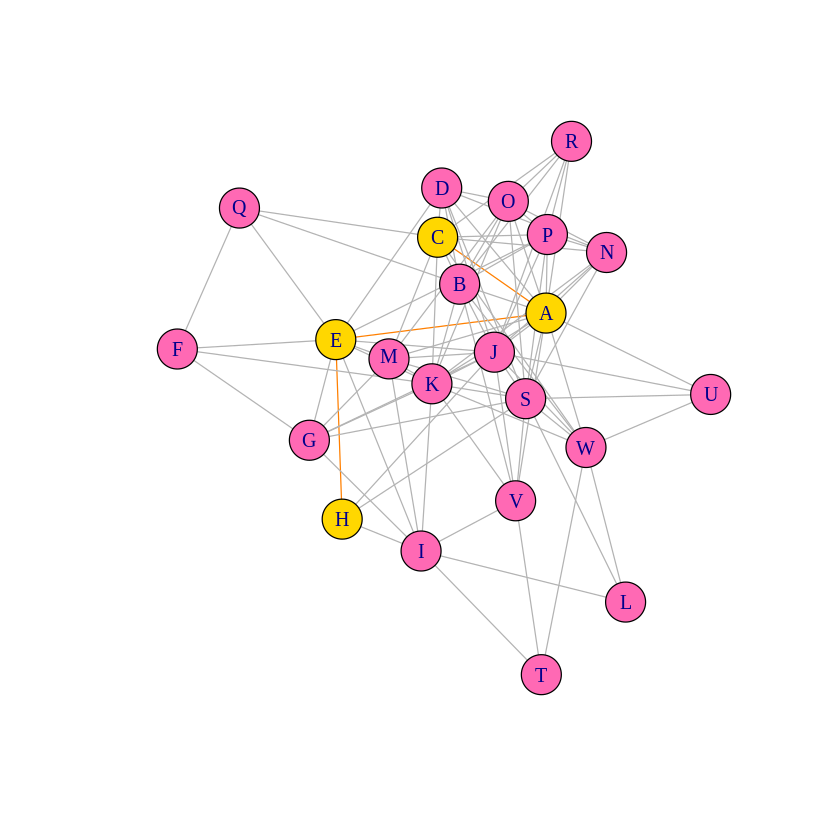

In [28]:
diameter(g1)
diameter(g1, directed=F, weights=NA)
get_diameter(g1, directed=F)

# Gráfico diâmetro
diam <- get_diameter(g1, directed=F)
vcol <- rep("hotpink", vcount(g1))
vcol[diam] <- "gold"
ecol <- rep("gray70", ecount(g1))
ecol[E(g1, path=diam)] <- "darkorange1"
# E(net, path=diam) finds edges along a path, here 'diam'

set.seed(0013)
plot(g1, vertex.color=vcol, edge.color=ecol, edge.arrow.mode=0)

In [29]:
mean_distance(g1, directed=F)
mean_distance(g1, directed=T)

edge_density(g1, loops=F)
edge_density(g1, loops=T)


[1] 1.687747

[1] 1.687747

[1] 0.3794466

[1] 0.3478261

In [30]:
# Explorando a rede
print("|-------------------------------------")
print("Degree")
degree(g1)
print("|-------------------------------------")
print("Closeness")
closeness(g1)
print("|-------------------------------------")
print("Betweenness")
betweenness(g1)

[1] "|-------------------------------------"
[1] "Degree"


A  B  C  D  E  J  K  M  N  O  P  R  S  U  V  W  Q  F  G  H  I  L  T 
15 11 10  8 11 15 14  9  8  9  9  6 14  4  7  9  4  4  7  4  8  3  3

[1] "|-------------------------------------"
[1] "Closeness"


A          B          C          D          E          J          K 
0.03448276 0.03030303 0.02857143 0.02702703 0.03030303 0.03448276 0.03333333 
         M          N          O          P          R          S          U 
0.02857143 0.02702703 0.02777778 0.02777778 0.02380952 0.03225806 0.02325581 
         V          W          Q          F          G          H          I 
0.02702703 0.02857143 0.02272727 0.02272727 0.02702703 0.02439024 0.02631579 
         L          T 
0.02272727 0.02083333

[1] "|-------------------------------------"
[1] "Betweenness"


A          B          C          D          E          J          K 
15.1781942 11.2893065  8.8842271  1.8612698 17.8018420 22.1607436 20.7687926 
         M          N          O          P          R          S          U 
 4.3382682  0.9884127  2.8164133  2.9193358  0.3888889 23.3435673  0.0000000 
         V          W          Q          F          G          H          I 
 6.3946034 15.3656725  1.5568182  0.8300000  3.0766624  0.6624200 12.2166667 
         L          T 
 0.6052632  0.5526316

## Rede One Mode - Alteração 2

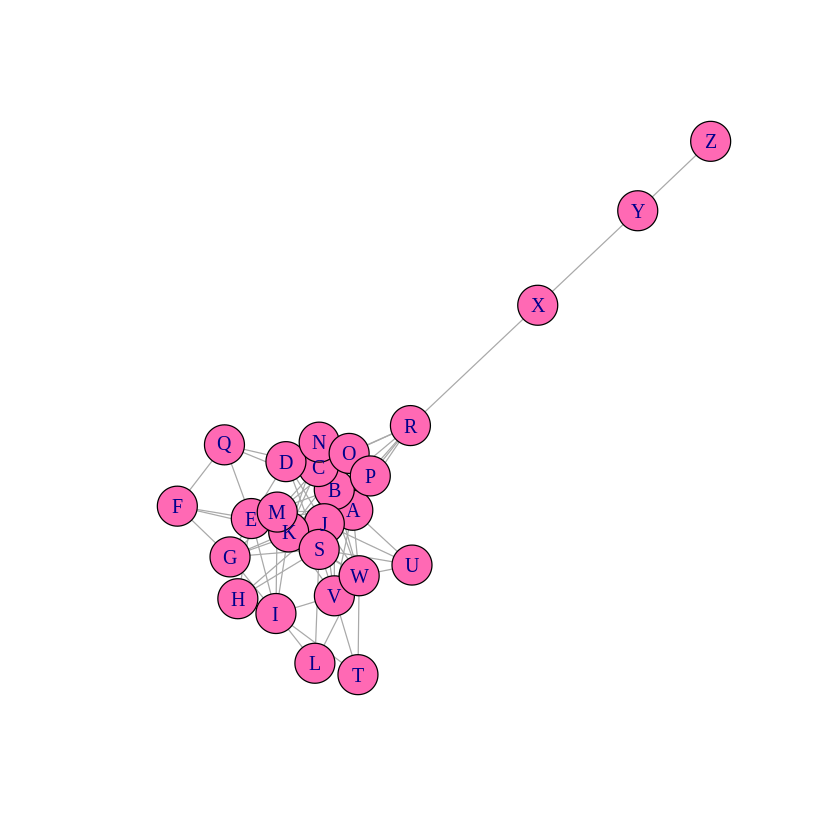

In [31]:
g2 <- graph_from_literal(A-B,A-C,A-D,A-E,A-J,A-K,A-M,A-N,A-O,A-P,A-R,A-S,A-U,A-V,A-W,
                        B-C,B-D,B-J,B-K,B-O,B-P,B-Q,B-R,B-V,B-W,
                        C-D,C-K,C-M,C-N,C-P,C-Q,C-R,C-W,
                        D-E,D-J,D-N,D-O,D-S,
                        E-F,E-G,E-H,E-I,E-J,E-K,E-M,E-P,E-Q,
                        F-G,F-K,F-Q,
                        G-I,G-J,G-K,G-M,G-S,
                        H-I,H-J,H-S,
                        I-K,I-L,I-M,I-T,I-V,
                        J-K,J-M,J-N,J-P,J-R,J-S,J-U,J-V,J-W,
                        K-M,K-N,K-O,K-S,K-V,K-W,
                        L-S,L-W,
                        M-O,M-S,
                        N-O,N-P,N-S,
                        O-P,O-R,O-S,
                        P-R,P-S,
                        R-X,
                        S-U,S-V,S-W,
                        T-V,T-W,
                        U-W,
                        X-Y,
                        Y-Z)

set.seed(001)
plot(g2,vertex.color = "hotpink")

In [32]:
get.adjacency(g2)
# vertices e arestas:
V(g2)
vcount(g2)
E(g2)
ecount(g2)
g2
clique_num(g2)
clique_size_counts(g2)

  [[ suppressing 26 column names ‘A’, ‘B’, ‘C’ ... ]]



26 x 26 sparse Matrix of class "dgCMatrix"
                                                     
A . 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . .
B 1 . 1 1 . 1 1 . . 1 1 1 . . 1 1 1 . . . . . . . . .
C 1 1 . 1 . . 1 1 1 . 1 1 . . . 1 1 . . . . . . . . .
D 1 1 1 . 1 1 . . 1 1 . . 1 . . . . . . . . . . . . .
E 1 . . 1 . 1 1 1 . . 1 . . . . . 1 1 1 1 1 . . . . .
J 1 1 . 1 1 . 1 1 1 . 1 1 1 1 1 1 . . 1 1 . . . . . .
K 1 1 1 . 1 1 . 1 1 1 . . 1 . 1 1 . 1 1 . 1 . . . . .
M 1 . 1 . 1 1 1 . . 1 . . 1 . . . . . 1 . 1 . . . . .
N 1 . 1 1 . 1 1 . . 1 1 . 1 . . . . . . . . . . . . .
O 1 1 . 1 . . 1 1 1 . 1 1 1 . . . . . . . . . . . . .
P 1 1 1 . 1 1 . . 1 1 . 1 1 . . . . . . . . . . . . .
R 1 1 1 . . 1 . . . 1 1 . . . . . . . . . . . . 1 . .
S 1 . . 1 . 1 1 1 1 1 1 . . 1 1 1 . . 1 1 . 1 . . . .
U 1 . . . . 1 . . . . . . 1 . . 1 . . . . . . . . . .
V 1 1 . . . 1 1 . . . . . 1 . . . . . . . 1 . 1 . . .
W 1 1 1 . . 1 1 . . . . . 1 1 . . . . . . . 1 1 . . .
Q . 1 1 . 1 . . . . . . . . . . . . 1 .

+ 26/26 vertices, named, from ad2503c:
 [1] A B C D E J K M N O P R S U V W Q F G H I L T X Y Z

[1] 26

+ 99/99 edges from ad2503c (vertex names):
 [1] A--B A--C A--D A--E A--J A--K A--M A--N A--O A--P A--R A--S A--U A--V A--W
[16] B--C B--D B--J B--K B--O B--P B--R B--V B--W B--Q C--D C--K C--M C--N C--P
[31] C--R C--W C--Q D--E D--J D--N D--O D--S E--J E--K E--M E--P E--Q E--F E--G
[46] E--H E--I J--K J--M J--N J--P J--R J--S J--U J--V J--W J--G J--H K--M K--N
[61] K--O K--S K--V K--W K--F K--G K--I M--O M--S M--G M--I N--O N--P N--S O--P
[76] O--R O--S P--R P--S R--X S--U S--V S--W S--G S--H S--L U--W V--I V--T W--L
[91] W--T Q--F F--G G--I H--I I--L I--T X--Y Y--Z

[1] 99

IGRAPH ad2503c UN-- 26 99 -- 
+ attr: name (v/c)
+ edges from ad2503c (vertex names):
 [1] A--B A--C A--D A--E A--J A--K A--M A--N A--O A--P A--R A--S A--U A--V A--W
[16] B--C B--D B--J B--K B--O B--P B--R B--V B--W B--Q C--D C--K C--M C--N C--P
[31] C--R C--W C--Q D--E D--J D--N D--O D--S E--J E--K E--M E--P E--Q E--F E--G
[46] E--H E--I J--K J--M J--N J--P J--R J--S J--U J--V J--W J--G J--H K--M K--N
[61] K--O K--S K--V K--W K--F K--G K--I M--O M--S M--G M--I N--O N--P N--S O--P
[76] O--R O--S P--R P--S R--X S--U S--V S--W S--G S--H S--L U--W V--I V--T W--L
[91] W--T Q--F F--G G--I H--I I--L I--T X--Y Y--Z

[1] 5

[1]  26  99 142  92  21

[1] 6

[1] 6

+ 7/26 vertices, named, from ad2503c:
[1] F E A R X Y Z

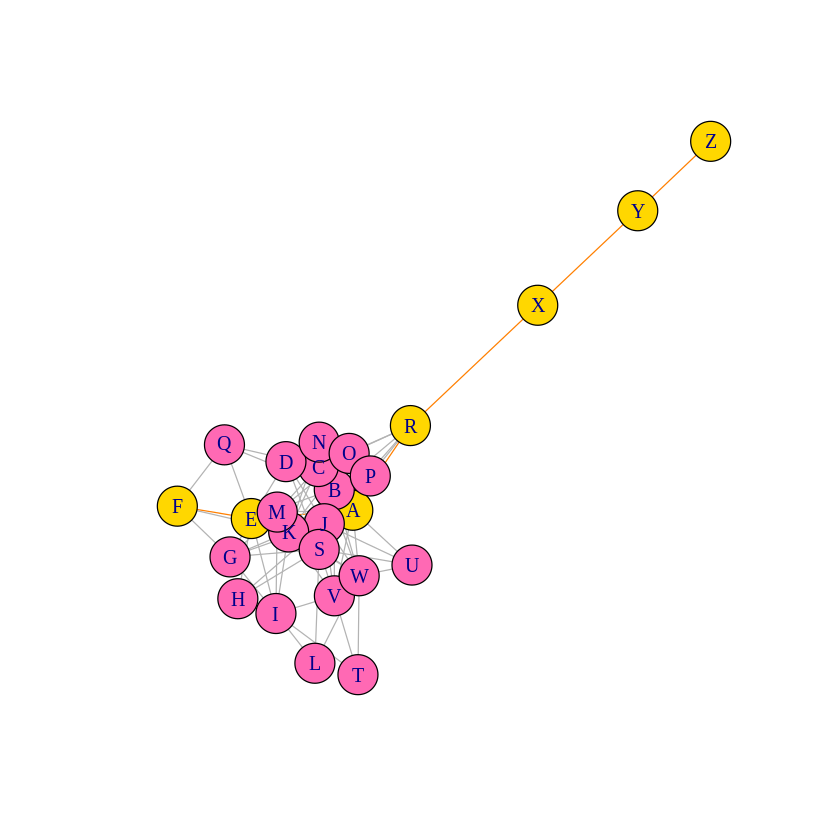

In [33]:
diameter(g2)
diameter(g2, directed=F, weights=NA)
get_diameter(g2, directed=F)

# Gráfico diâmetro
diam <- get_diameter(g2, directed=F)
vcol <- rep("hotpink", vcount(g2))
vcol[diam] <- "gold"
ecol <- rep("gray70", ecount(g2))
ecol[E(g2, path=diam)] <- "darkorange1"
# E(net, path=diam) finds edges along a path, here 'diam'

set.seed(0001)
plot(g2, vertex.color=vcol, edge.color=ecol, edge.arrow.mode=0)

In [34]:
mean_distance(g2, directed=F)
mean_distance(g2, directed=T)

edge_density(g2, loops=F)
edge_density(g2, loops=T)


[1] 2.138462

[1] 2.138462

[1] 0.3046154

[1] 0.2820513

In [35]:
# Explorando a rede
print("|-------------------------------------")
print("Degree")
degree(g2)
print("|-------------------------------------")
print("Closeness")
closeness(g2)
print("|-------------------------------------")
print("Betweenness")
betweenness(g2)

[1] "|-------------------------------------"
[1] "Degree"


A  B  C  D  E  J  K  M  N  O  P  R  S  U  V  W  Q  F  G  H  I  L  T  X  Y  Z 
15 11 10  8 11 15 14  9  8  9  9  7 14  4  7  9  4  4  7  4  8  3  3  2  2  1

[1] "|-------------------------------------"
[1] "Closeness"


A          B          C          D          E          J          K 
0.02631579 0.02380952 0.02272727 0.02040816 0.02222222 0.02631579 0.02380952 
         M          N          O          P          R          S          U 
0.02127660 0.02040816 0.02222222 0.02222222 0.02083333 0.02325581 0.01818182 
         V          W          Q          F          G          H          I 
0.02040816 0.02127660 0.01785714 0.01694915 0.02040816 0.01886792 0.01886792 
         L          T          X          Y          Z 
0.01694915 0.01587302 0.01470588 0.01111111 0.00877193

[1] "|-------------------------------------"
[1] "Betweenness"


A          B          C          D          E          J          K 
25.5866739 17.8698451 15.3861943  1.8612698 19.1494356 39.1948918 23.0147819 
         M          N          O          P          R          S          U 
 5.0441506  0.9884127  7.1170817  6.0935337 66.3888889 24.8435673  0.0000000 
         V          W          Q          F          G          H          I 
 8.2097295 18.5799582  2.1022727  0.8300000  3.5258603  0.8388906 12.2166667 
         L          T          X          Y          Z 
 0.6052632  0.5526316 46.0000000 24.0000000  0.0000000

## Rede Two Mode

In [37]:
# Endereço do arquivo na nuvem, para funcionar para todos os colegas, em qualquer computador
url_dataset <- c("https://raw.githubusercontent.com/ramonferrari/mpgc_ti/main/Rede%20Two%20Mode_Tarefa%20Aulas%205%20e%206.csv")


In [38]:
# Leitura dos dados
compras <- read.table(url_dataset,header=TRUE,sep = ",")

In [39]:
# Dataset lido corretamente?
head(compras)
names(compras)

,Pessoas,iPhone,iPad,Livro.Harry.Potter,jogo.MineCraft,Camisa.do.Corinthians,Bola.de.Futebol,Flauta.Transversal,Lista.Telefônica,Caixa.de.Fósforos,Calculadora,Detergente,Agenda,Cachorro,Pokemon,Álcool.Gel
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,João,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1
2,Maria,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
3,José,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
4,Paulo,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1
5,Pedro,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1
6,Luisa,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1


[1] "Pessoas"               "iPhone"                "iPad"                 
 [4] "Livro.Harry.Potter"    "jogo.MineCraft"        "Camisa.do.Corinthians"
 [7] "Bola.de.Futebol"       "Flauta.Transversal"    "Lista.Telefônica"     
[10] "Caixa.de.Fósforos"     "Calculadora"           "Detergente"           
[13] "Agenda"                "Cachorro"              "Pokemon"              
[16] "Álcool.Gel"

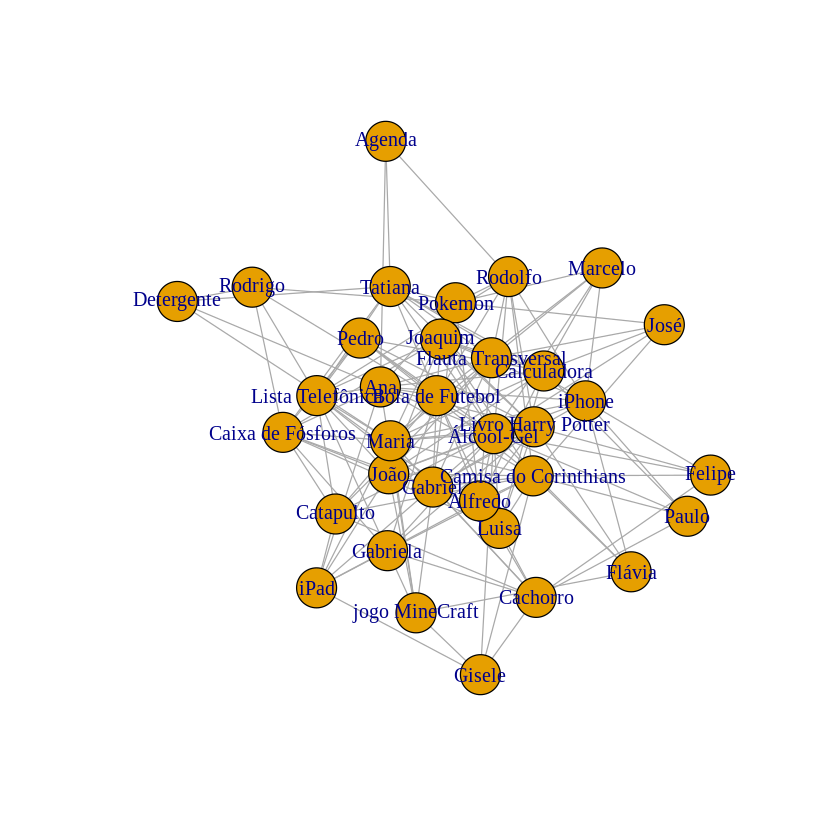

In [40]:
gg <- graph_from_literal("João"-"iPhone","João"-"iPad","João"-"jogo MineCraft","João"-"Camisa do Corinthians","João"-"Flauta Transversal","João"-"Lista Telefônica","João"-"Caixa de Fósforos","João"-"Calculadora","João"-"Pokemon","João"-"Álcool-Gel","Maria"-"iPhone","Maria"-"iPad","Maria"-"Livro Harry Potter",
                         "Maria"-"jogo MineCraft","Maria"-"Camisa do Corinthians","Maria"-"Bola de Futebol","Maria"-"Flauta Transversal","Maria"-"Lista Telefônica","Maria"-"Caixa de Fósforos","Maria"-"Calculadora","Maria"-"Detergente","Maria"-"Cachorro","Maria"-"Pokemon","Maria"-"Álcool-Gel","José"-"Camisa do Corinthians","José"-"Flauta Transversal",
                         "José"-"Calculadora","José"-"Pokemon","José"-"Álcool-Gel","Paulo"-"iPhone","Paulo"-"Camisa do Corinthians","Paulo"-"Calculadora","Paulo"-"Cachorro","Paulo"-"Álcool-Gel","Pedro"-"Livro Harry Potter","Pedro"-"Camisa do Corinthians","Pedro"-"Bola de Futebol","Pedro"-"Lista Telefônica","Pedro"-"Caixa de Fósforos","Pedro"-"Calculadora",
                         "Pedro"-"Álcool-Gel","Luisa"-"Livro Harry Potter","Luisa"-"Camisa do Corinthians","Luisa"-"Bola de Futebol","Luisa"-"Lista Telefônica",
                         "Luisa"-"Caixa de Fósforos","Luisa"-"Calculadora","Luisa"-"Cachorro","Luisa"-"Álcool-Gel","Marcelo"-"iPhone","Marcelo"-"Bola de Futebol","Marcelo"-"Flauta Transversal","Marcelo"-"Calculadora","Marcelo"-"Pokemon","Marcelo"-"Álcool-Gel","Alfredo"-"iPad","Alfredo"-"Livro Harry Potter","Alfredo"-"Camisa do Corinthians","Alfredo"-"Bola de Futebol",
                         "Alfredo"-"Flauta Transversal","Alfredo"-"Calculadora","Alfredo"-"Cachorro","Alfredo"-"Pokemon","Alfredo"-"Álcool-Gel","Joaquim"-"iPhone","Joaquim"-"Livro Harry Potter","Joaquim"-"Camisa do Corinthians","Joaquim"-"Bola de Futebol","Joaquim"-"Flauta Transversal","Joaquim"-"Lista Telefônica","Joaquim"-"Caixa de Fósforos","Joaquim"-"Calculadora",
                         "Joaquim"-"Pokemon","Joaquim"-"Álcool-Gel","Gabriela"-"iPad","Gabriela"-"Livro Harry Potter","Gabriela"-"jogo MineCraft","Gabriela"-"Camisa do Corinthians","Gabriela"-"Bola de Futebol","Gabriela"-"Lista Telefônica","Gabriela"-"Caixa de Fósforos","Gabriela"-"Cachorro","Gabriela"-"Álcool-Gel","Flávia"-"iPhone","Flávia"-"Livro Harry Potter",
                         "Flávia"-"jogo MineCraft","Flávia"-"Camisa do Corinthians","Flávia"-"Álcool-Gel","Catapulto"-"iPad","Catapulto"-"Camisa do Corinthians","Catapulto"-"Bola de Futebol","Catapulto"-"Flauta Transversal","Catapulto"-"Lista Telefônica","Catapulto"-"Caixa de Fósforos","Catapulto"-"Cachorro","Catapulto"-"Álcool-Gel","Rodrigo"-"Lista Telefônica",
                         "Rodrigo"-"Caixa de Fósforos","Rodrigo"-"Detergente","Rodrigo"-"Pokemon","Rodrigo"-"Álcool-Gel","Gabriel"-"iPhone","Gabriel"-"iPad","Gabriel"-"Livro Harry Potter","Gabriel"-"jogo MineCraft","Gabriel"-"Camisa do Corinthians","Gabriel"-"Bola de Futebol","Gabriel"-"Flauta Transversal","Gabriel"-"Lista Telefônica","Gabriel"-"Caixa de Fósforos",
                         "Gabriel"-"Cachorro","Gabriel"-"Pokemon","Gabriel"-"Álcool-Gel","Rodolfo"-"iPhone","Rodolfo"-"Livro Harry Potter","Rodolfo"-"Camisa do Corinthians","Rodolfo"-"Bola de Futebol","Rodolfo"-"Flauta Transversal","Rodolfo"-"Lista Telefônica","Rodolfo"-"Agenda","Rodolfo"-"Pokemon","Rodolfo"-"Álcool-Gel","Felipe"-"iPhone","Felipe"-"Livro Harry Potter",
                         "Felipe"-"Camisa do Corinthians","Felipe"-"Cachorro","Felipe"-"Álcool-Gel","Gisele"-"iPad","Gisele"-"jogo MineCraft","Gisele"-"Camisa do Corinthians","Gisele"-"Cachorro","Gisele"-"Álcool-Gel","Tatiana"-"iPhone","Tatiana"-"Livro Harry Potter","Tatiana"-"Bola de Futebol","Tatiana"-"Flauta Transversal","Tatiana"-"Lista Telefônica","Tatiana"-"Caixa de Fósforos",
                         "Tatiana"-"Calculadora","Tatiana"-"Detergente","Tatiana"-"Agenda","Tatiana"-"Pokemon","Tatiana"-"Álcool-Gel","Ana"-"iPhone","Ana"-"iPad","Ana"-"Livro Harry Potter","Ana"-"jogo MineCraft","Ana"-"Camisa do Corinthians","Ana"-"Bola de Futebol","Ana"-"Flauta Transversal","Ana"-"Lista Telefônica","Ana"-"Caixa de Fósforos","Ana"-"Calculadora","Ana"-"Detergente",
                         "Ana"-"Agenda","Ana"-"Pokemon","Ana"-"Álcool-Gel")

plot(gg)

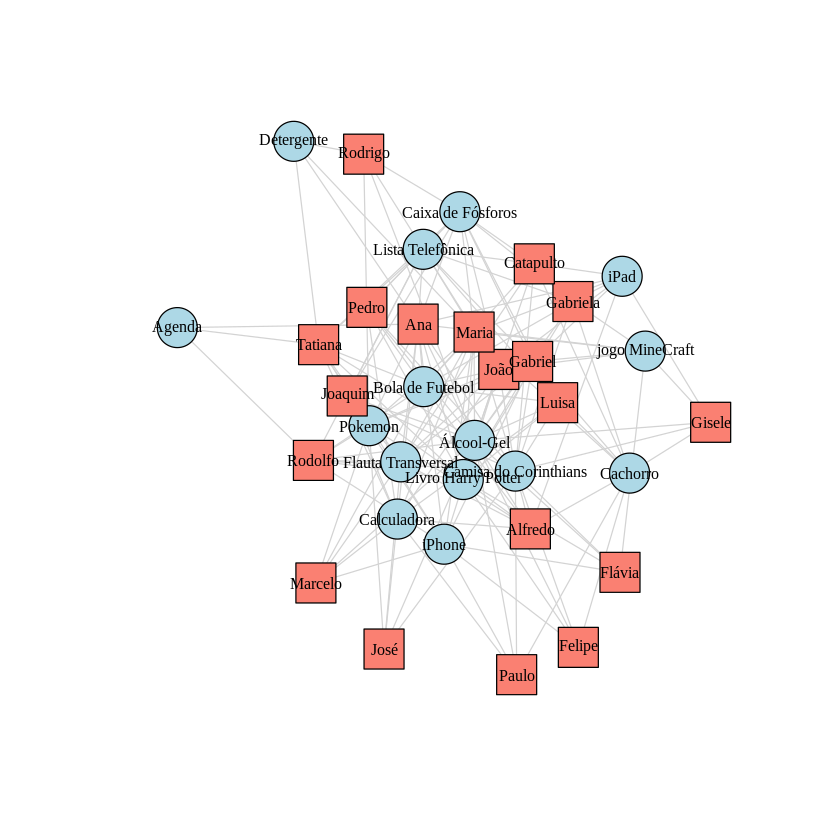

In [41]:
V(gg)$type <- bipartite_mapping(gg)$type # ensina o tipo como se fosse um atributo da rede

V(gg)$color <- ifelse(V(gg)$type, "lightblue", "salmon")
V(gg)$shape <- ifelse(V(gg)$type, "circle", "square")
E(gg)$color <- "lightgray"
plot(gg, vertex.label.cex = 0.8, vertex.label.color = "black")

In [42]:
get.adjacency(gg)
# vertices e arestas:
V(gg)
vcount(gg)
E(gg)
ecount(gg)

clique_num(gg)
clique_size_counts(gg)

  [[ suppressing 34 column names ‘João’, ‘iPhone’, ‘iPad’ ... ]]



34 x 34 sparse Matrix of class "dgCMatrix"
                                                                               
João                  . 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . . . . . . . . . .
iPhone                1 . . . . . . . . . . 1 . . . . . 1 . . 1 . 1 . 1 . . 1 1
iPad                  1 . . . . . . . . . . 1 . . . . . . . . . 1 . 1 . 1 . 1 .
jogo MineCraft        1 . . . . . . . . . . 1 . . . . . . . . . . . 1 1 . . 1 .
Camisa do Corinthians 1 . . . . . . . . . . 1 . . . . 1 1 1 1 . 1 1 1 1 1 . 1 1
Flauta Transversal    1 . . . . . . . . . . 1 . . . . 1 . . . 1 1 1 . . 1 . 1 1
Lista Telefônica      1 . . . . . . . . . . 1 . . . . . . 1 1 . . 1 1 . 1 1 1 1
Caixa de Fósforos     1 . . . . . . . . . . 1 . . . . . . 1 1 . . 1 1 . 1 1 1 .
Calculadora           1 . . . . . . . . . . 1 . . . . 1 1 1 1 1 1 1 . . . . . .
Pokemon               1 . . . . . . . . . . 1 . . . . 1 . . . 1 1 1 . . . 1 1 1
Álcool-Gel            1 . . . . . . . . . . 1 . . . . 1 1 1 1 1 1 1 1 1 1 1 1

+ 34/34 vertices, named, from 24690e8:
 [1] João                  iPhone                iPad                 
 [4] jogo MineCraft        Camisa do Corinthians Flauta Transversal   
 [7] Lista Telefônica      Caixa de Fósforos     Calculadora          
[10] Pokemon               Álcool-Gel            Maria                
[13] Livro Harry Potter    Bola de Futebol       Detergente           
[16] Cachorro              José                  Paulo                
[19] Pedro                 Luisa                 Marcelo              
[22] Alfredo               Joaquim               Gabriela             
[25] Flávia                Catapulto             Rodrigo              
[28] Gabriel               Rodolfo               Agenda               
+ ... omitted several vertices

[1] 34

+ 157/157 edges from 24690e8 (vertex names):
 [1] João  --iPhone                João  --iPad                 
 [3] João  --jogo MineCraft        João  --Camisa do Corinthians
 [5] João  --Flauta Transversal    João  --Lista Telefônica     
 [7] João  --Caixa de Fósforos     João  --Calculadora          
 [9] João  --Pokemon               João  --Álcool-Gel           
[11] iPhone--Maria                 iPhone--Paulo                
[13] iPhone--Marcelo               iPhone--Joaquim              
[15] iPhone--Flávia                iPhone--Gabriel              
[17] iPhone--Rodolfo               iPhone--Felipe               
[19] iPhone--Tatiana               iPhone--Ana                  
+ ... omitted several edges

[1] 157

[1] 2

[1]  34 157

[1] 4

[1] 4

+ 5/34 vertices, named, from 24690e8:
[1] Cachorro Maria    iPhone   Rodolfo  Agenda  

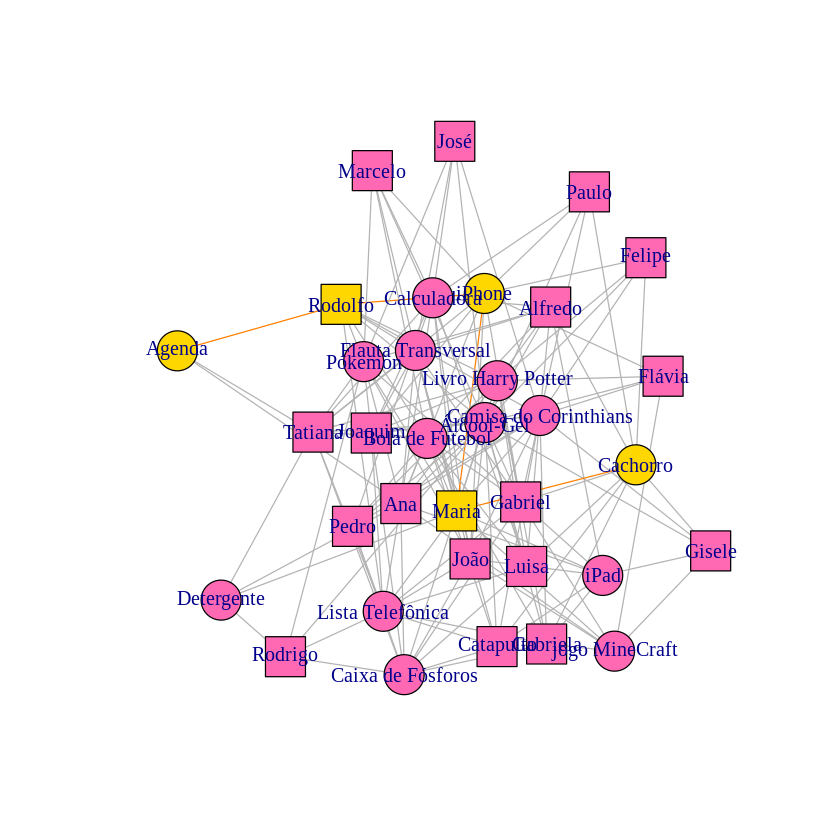

In [43]:
diameter(gg)
diameter(gg, directed=F, weights=NA)
get_diameter(gg, directed=F)

# Gráfico diâmetro
diam <- get_diameter(gg, directed=F)
vcol <- rep("hotpink", vcount(gg))
vcol[diam] <- "gold"
ecol <- rep("gray70", ecount(gg))
ecol[E(gg, path=diam)] <- "darkorange1"
# E(net, path=diam) finds edges along a path, here 'diam'

set.seed(0013)
plot(gg, vertex.color=vcol, edge.color=ecol, edge.arrow.mode=0)

In [44]:
mean_distance(gg, directed=F)
mean_distance(gg, directed=T)

edge_density(gg, loops=F)
edge_density(gg, loops=T)

[1] 1.951872

[1] 1.951872

[1] 0.2798574

[1] 0.2638655